#Titanic Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_classification.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

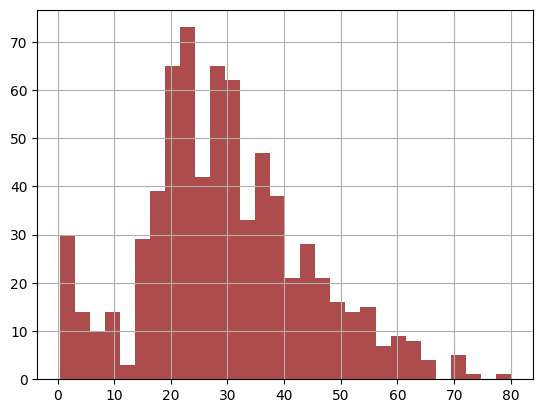

In [6]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

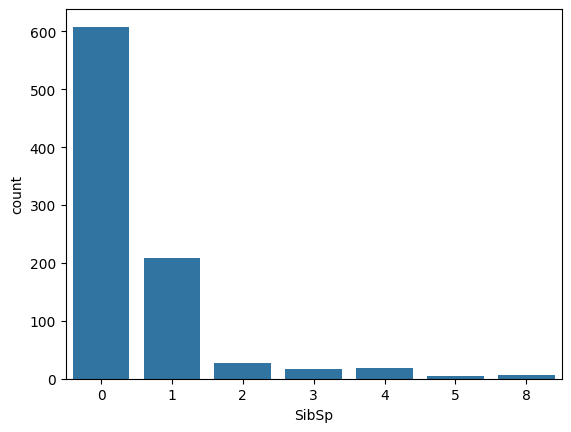

In [7]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

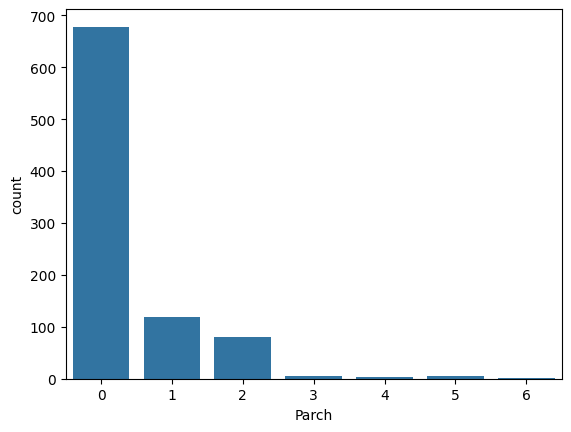

In [8]:
sns.countplot(x='Parch',data=train)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [10]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
train['Embarked'] = train['Embarked'].fillna('S')

<Axes: >

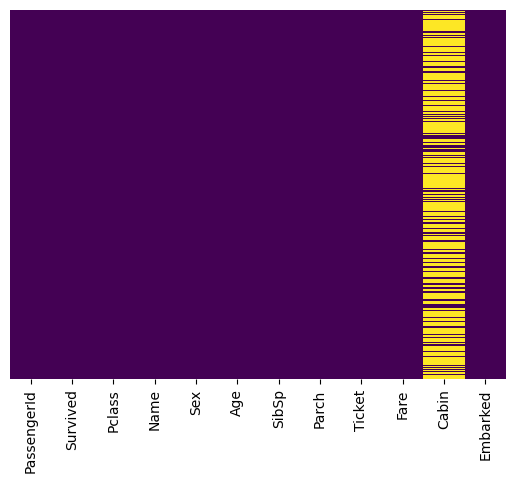

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.drop('Cabin',axis=1,inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
train.dropna(inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [18]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
train = pd.concat([train,sex,embark],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,True,False,True
700,701,1,18.0,1,0,227.525,False,False,False
748,749,1,19.0,1,0,53.100,True,False,True
751,752,3,6.0,0,1,12.475,True,False,True
481,482,2,29.0,0,0,0.000,True,False,True


In [26]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [28]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [19 20]]


In [29]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.80      0.51      0.62        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.75      0.73      0.72        90



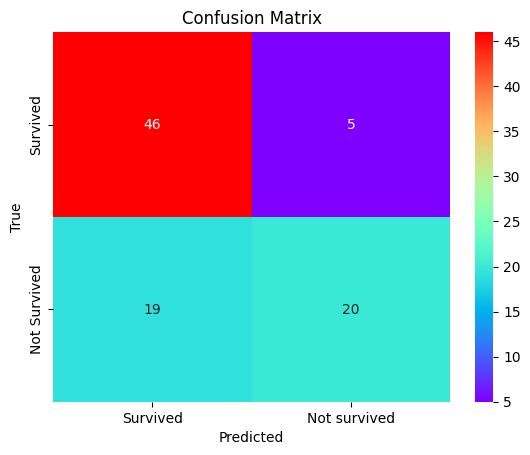

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow', xticklabels=['Survived', 'Not survived'], yticklabels=['Survived', 'Not Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, predictions)

In [35]:
import numpy as np
def predict_survival(model, new_data):
  #Predicts whether a person will survive or not based on the provided model and new data.
  # Convert new_data to a NumPy array
  new_data_array = np.asarray(new_data)
  # Reshape the array to match the model input format
  new_data_reshaped = new_data_array.reshape(1, -1)
  # Make a prediction
  prediction = model.predict(new_data_reshaped)[0]
  # Return the corresponding survival status
  if prediction == 0:
    return "Not Survived"
  else:
    return "Survived"
# Example usage
new_data = [[4,		1,	35.0,	1,	0,	53.1000,	False,	False,	True]]
survival_prediction = predict_survival(logmodel, new_data)
print(f"Prediction: {survival_prediction}")

Prediction: Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
